Here, we build Hilbert space-filling curve in order to transform 2D data to 1D signal. A space-filling curve is a line that completely fills up the unit square. It is a way of mapping between 2D and 1D space that preserves locality fairly well. Hilbert curves of orders 1, 2, and 3 are shown in figure below. 

Hilbert curves of orders 1 (red), 2 (blue), and 3 (black) |  3 Colour channel matrices of the input image of size 4x4x3
:-------------------------:|:-------------------------:
<img src="images/hilbert_curves.png" style="width:300px;height:300px"/>  |  <img src="images/rgb_matrices.png" style="width:400px;height:300px"/>

Here, Hilbert curve passes through every pixel of the image. The curve is constructed as a sequence of short lines. Here is the direction order to build first half of the first order curve: (1,0), (0,-1), (-1,0), (0,-1), (0,-1), (1,0), (0, 1), (1,0). This curve now can read each pixel of the square matrix.

<img src="images/hilbertRGB.png" style="width:500px;height:400px;">
For example, we read the red matrix of the 4x4x3 image in the following order: 35, 19, 22, 13, 4, 0, 8, 3, 7, 1, 3, 10, 53, 16, 25, 6.
The following code in Python 3 shows how to build the modified Nth order Hilbert curve.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# N is the order of the curve
def rix(cy, N, d):
    rx = np.zeros(N, dtype=int)
    for i in range(N):
        rx[i] = d*cy[N-i-1]
        
    return rx

    

def hilbert_curve(N, plot_curve = True):
    #initialize arrays
    dx = np.zeros(4**(N), dtype=int)
    dy = np.zeros(4**(N), dtype=int)
    

    dxp = np.zeros(4**(N), dtype=int)
    dyp = np.zeros(4**(N), dtype=int)

    x = np.zeros(4**(N), dtype=int)
    y = np.zeros(4**(N), dtype=int)
    
    # directions of curve 
    dxp[0:3] = [0, 1, 0] 
    dyp[0:3] = [1, 0, -1]
    

    
    #building fractal curve
    for n in range(1,N):
        dx[0:(4**(n+1)-1)] = np.concatenate((rix(dyp[0:(4**n-1)], 4**n-1, -1), [0], dxp[0:(4**n-1)], [1], dxp[0:(4**n-1)], [0], rix(dyp[0:(4**n-1)], 4**n-1, 1)))
        dy[0:(4**(n+1)-1)] = np.concatenate((rix(dxp[0:(4**n-1)], 4**n-1, 1), [1], dyp[0:(4**n-1)], [0], dyp[0:(4**n-1)], [-1], rix(dxp[0:(4**n-1)], 4**n-1, -1)))
        dxp[0:(4**(n+1)-1)] = dx[0:(4**(n+1)-1)]
        dyp[0:(4**(n+1)-1)] = dy[0:(4**(n+1)-1)]
        #print(dx)
        #print(dy)
    for i in range(2**(2*N)-1):
        x[i+1] = x[i] + dx[i]
        y[i+1] = y[i] + dy[i]
    
    if plot_curve:
        plt.plot(x,y)
        plt.show()
        
    return x, y



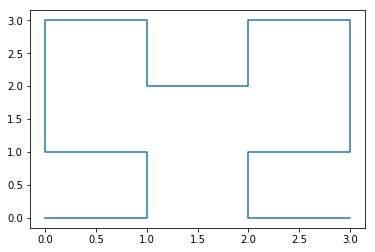

In [8]:
#2nd order curve
x,y = hilbert_curve(2)

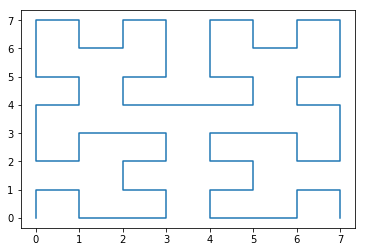

In [10]:
# 3th order curve
x,y = hilbert_curve(3) 

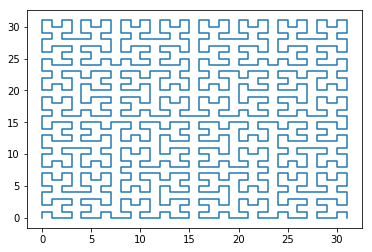

In [11]:
# 5th order curve
x,y = hilbert_curve(5)